In [1]:
import numpy as np
import pandas as pd
from keras.layers import Dense, Flatten, LSTM
from keras.models import Sequential
import keras

Using TensorFlow backend.


### Data Preprocessing
#### Prepraring the dependent and independent features

In [2]:
def prepare_data(time_series_data, n_features):
    
    X, y=[], []
    for i in range(len(time_series_data)):
        
        end_index=i+n_features
        if end_index > len(time_series_data)-1:
            break
        seq_x, seq_y=time_series_data[i:end_index], time_series_data[end_index]
        X.append(seq_x)
        y.append(seq_y)
        
    return np.array(X), np.array(y)

In [3]:
time_series=[100, 125, 133, 146, 158, 169, 175, 187, 196, 210]
n_steps=3
X, y = prepare_data(time_series, n_steps)
X, y

(array([[100, 125, 133],
        [125, 133, 146],
        [133, 146, 158],
        [146, 158, 169],
        [158, 169, 175],
        [169, 175, 187],
        [175, 187, 196]]),
 array([146, 158, 169, 175, 187, 196, 210]))

In [4]:
X.shape

(7, 3)

In [5]:
n_features=1
X=X.reshape((X.shape[0], X.shape[1], n_features))
X.shape

(7, 3, 1)

In [6]:
X[0]

array([[100],
       [125],
       [133]])

### Building LSTM Model

In [7]:
model=Sequential()
model.add(LSTM(1000, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(512, activation='relu', return_sequences=True))
model.add(LSTM(100, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

model.compile(loss=keras.losses.mean_absolute_error, optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 3, 1000)           4008000   
_________________________________________________________________
lstm_2 (LSTM)                (None, 3, 512)            3098624   
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               245200    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                6464      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 7,358,353
Trainable params: 7,358,353
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.fit(X, y, epochs=300, verbose=1)

Epoch 1/300
7/7 [==============================] - 2s 330ms/step - loss: 177.6803 - accuracy: 0.0000e+00
Epoch 2/300
7/7 [==============================] - 0s 22ms/step - loss: 175.3918 - accuracy: 0.0000e+00
Epoch 3/300
7/7 [==============================] - 0s 21ms/step - loss: 168.4209 - accuracy: 0.0000e+00
Epoch 4/300
7/7 [==============================] - 0s 20ms/step - loss: 154.3312 - accuracy: 0.0000e+00
Epoch 5/300
7/7 [==============================] - 0s 20ms/step - loss: 130.2007 - accuracy: 0.0000e+00
Epoch 6/300
7/7 [==============================] - 0s 20ms/step - loss: 90.1531 - accuracy: 0.0000e+00
Epoch 7/300
7/7 [==============================] - 0s 20ms/step - loss: 17.4707 - accuracy: 0.0000e+00
Epoch 8/300
7/7 [==============================] - 0s 21ms/step - loss: 91.7449 - accuracy: 0.0000e+00
Epoch 9/300
7/7 [==============================] - 0s 22ms/step - loss: 93.4160 - accuracy: 0.0000e+00
Epoch 10/300
7/7 [==============================] - 0s 19ms/step - 

7/7 [==============================] - 0s 22ms/step - loss: 5.1832 - accuracy: 0.0000e+00
Epoch 82/300
7/7 [==============================] - 0s 22ms/step - loss: 2.5207 - accuracy: 0.2857
Epoch 83/300
7/7 [==============================] - 0s 20ms/step - loss: 2.7010 - accuracy: 0.1429
Epoch 84/300
7/7 [==============================] - 0s 21ms/step - loss: 3.6658 - accuracy: 0.2857
Epoch 85/300
7/7 [==============================] - 0s 21ms/step - loss: 2.3971 - accuracy: 0.0000e+00
Epoch 86/300
7/7 [==============================] - 0s 22ms/step - loss: 4.6117 - accuracy: 0.0000e+00
Epoch 87/300
7/7 [==============================] - 0s 22ms/step - loss: 2.3082 - accuracy: 0.1429
Epoch 88/300
7/7 [==============================] - 0s 21ms/step - loss: 2.8155 - accuracy: 0.2857
Epoch 89/300
7/7 [==============================] - 0s 21ms/step - loss: 2.3807 - accuracy: 0.0000e+00
Epoch 90/300
7/7 [==============================] - 0s 20ms/step - loss: 2.6633 - accuracy: 0.0000e+00
Epo

7/7 [==============================] - 0s 20ms/step - loss: 4.0329 - accuracy: 0.0000e+00
Epoch 162/300
7/7 [==============================] - 0s 19ms/step - loss: 4.2496 - accuracy: 0.0000e+00
Epoch 163/300
7/7 [==============================] - 0s 20ms/step - loss: 3.6847 - accuracy: 0.1429
Epoch 164/300
7/7 [==============================] - 0s 21ms/step - loss: 3.0962 - accuracy: 0.1429
Epoch 165/300
7/7 [==============================] - 0s 20ms/step - loss: 3.2280 - accuracy: 0.1429
Epoch 166/300
7/7 [==============================] - 0s 21ms/step - loss: 3.3085 - accuracy: 0.1429
Epoch 167/300
7/7 [==============================] - 0s 21ms/step - loss: 2.3629 - accuracy: 0.2857
Epoch 168/300
7/7 [==============================] - 0s 20ms/step - loss: 2.2028 - accuracy: 0.0000e+00
Epoch 169/300
7/7 [==============================] - 0s 20ms/step - loss: 2.2013 - accuracy: 0.1429
Epoch 170/300
7/7 [==============================] - 0s 21ms/step - loss: 2.1889 - accuracy: 0.0000e+0

Epoch 241/300
7/7 [==============================] - 0s 26ms/step - loss: 2.7042 - accuracy: 0.1429
Epoch 242/300
7/7 [==============================] - 0s 22ms/step - loss: 6.3811 - accuracy: 0.0000e+00
Epoch 243/300
7/7 [==============================] - 0s 21ms/step - loss: 6.7879 - accuracy: 0.0000e+00
Epoch 244/300
7/7 [==============================] - 0s 24ms/step - loss: 2.2577 - accuracy: 0.0000e+00
Epoch 245/300
7/7 [==============================] - 0s 22ms/step - loss: 6.1132 - accuracy: 0.0000e+00
Epoch 246/300
7/7 [==============================] - 0s 33ms/step - loss: 4.3285 - accuracy: 0.0000e+00
Epoch 247/300
7/7 [==============================] - 0s 28ms/step - loss: 4.3736 - accuracy: 0.0000e+00
Epoch 248/300
7/7 [==============================] - 0s 25ms/step - loss: 4.8462 - accuracy: 0.0000e+00
Epoch 249/300
7/7 [==============================] - 0s 28ms/step - loss: 2.4609 - accuracy: 0.2857
Epoch 250/300
7/7 [==============================] - 0s 23ms/step - loss

### Prediction for next 10 days

In [9]:
x_input = np.array([187, 196, 210])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):
    
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[218.98721]
1 day input [196.         210.         218.98721313]
1 day output [[230.07921]]
2 day input [210.         218.98721313 230.07920837]
2 day output [[242.96727]]
3 day input [218.98721 230.07921 242.96727]
3 day output [[253.74687]]
4 day input [230.07921 242.96727 253.74687]
4 day output [[266.34326]]
5 day input [242.96727 253.74687 266.34326]
5 day output [[279.66916]]
6 day input [253.74687 266.34326 279.66916]
6 day output [[292.3931]]
7 day input [266.34326 279.66916 292.3931 ]
7 day output [[306.54782]]
8 day input [279.66916 292.3931  306.54782]
8 day output [[321.1807]]
9 day input [292.3931  306.54782 321.1807 ]
9 day output [[335.99585]]
[218.98721, 230.07921, 242.96727, 253.74687, 266.34326, 279.66916, 292.3931, 306.54782, 321.1807, 335.99585]


In [10]:
time_series

[100, 125, 133, 146, 158, 169, 175, 187, 196, 210]

In [11]:
lst_output

[218.98721,
 230.07921,
 242.96727,
 253.74687,
 266.34326,
 279.66916,
 292.3931,
 306.54782,
 321.1807,
 335.99585]

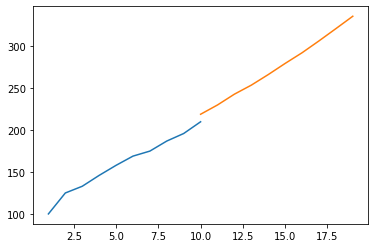

In [12]:
import matplotlib.pyplot as plt

day_new=np.arange(1,11)
day_pred=np.arange(10,20)

plt.plot(day_new, time_series)
plt.plot(day_pred, lst_output)